# Data Preprocessing and Feature Engineering in Machine Learning

**Objective:**

This assignment aims to equip you with practical skills in data preprocessing, feature engineering, and feature selection techniques, which are crucial for building efficient machine learning models. You will work with a provided dataset to apply various techniques such as scaling, encoding, and feature selection methods including isolation forest and PPS score analysis.

**Dataset:**

Given "Adult" dataset, which predicts whether income exceeds $50K/yr based on census data.


## **1. Data Exploration and Preprocessing:**

### Importing Libraries and Loading Data

In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"E:\Data Science Course\Completed Data Science Assignments\adult_with_headers.csv")

In [254]:
# Checking the stucture of the data
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [255]:
df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

### Checking dataset information and statistical summary

In [256]:
# Checking Information about the Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [257]:
# Summary statistics
print(df.describe())

                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


After loading the Adult dataset and performing initial exploratory data analysis, we have obtained summary statistics for some key features:

* Age: The average age is approximately 38 years old, with a standard deviation of around 13 years. There seems to be no significant skewness since the minimum value is 17 and maximum is 90.

* Fnlwgt: This weight variable has a large mean of about 18,978 and a high standard deviation of nearly 10,600. It appears to be heavily right-skewed due to its long tail towards higher values.

* Education_num: Most individuals have completed up to 12 years of formal education, with an average of 10.08 years and a standard deviation of 2.57 years.

* Capital gain and loss: Both show considerable variability, with means of $1,077 and $87 respectively, but also exhibit substantial skewness, especially capital gain with a range from 0 to 99,999.

* Hours_per_week: People generally work around 40 hours per week, with a slight variation ranging from 1 hour to 99 hours.

In order to prepare our dataset for modeling purposes, let us proceed with handling missing values, applying scaling techniques, encoding categorical variables, creating new features through feature engineering, removing outliers using Isolation Forest, and analyzing relationships among features using PPS scores.

### Handling of missing values 

In [258]:
# Check for missing values
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In the given output, there appear to be no missing values present in any column of the dataset.

### Selecting Numerical columns 

In [259]:
# Check data types
print(df.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object


In [260]:
# checking education_num column, it is behaving like category/discrete numerical

df['education_num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

If education_num is treated as a categorical variable, it should not be included in the list of numerical columns that are subjected to scaling methods like Standard Scaling or Min-Max Scaling. Instead, it should be processed using categorical encoding techniques such as One-Hot Encoding or Label Encoding.

To exclude education_num from the list of numerical columns, we can modify the selection of numerical columns by explicitly removing education_num after identifying all numerical columns.

**Summary:**

***Numerical Columns for Scaling:*** age, fnlwgt, capital_gain, capital_loss, hours_per_week.

***Categorical Columns:*** education_num (to be encoded rather than scaled).

In [261]:
# Selecting numerical columns
numerical_cols = df.select_dtypes(include=[int, float]).columns

# Remove 'education_num' from the list of numerical columns if it exists
numerical_cols = numerical_cols.drop('education_num')

# Now, numerical_cols will contain all the numerical columns except 'education_num'
print(numerical_cols)

Index(['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week'], dtype='object')


### Checking Distribution of numerical features:

By checking the distribution before applying scaling, we ensure that we select the most appropriate technique for each feature, leading to better-prepared data, more accurate models, and more reliable predictions. This step is essential in the data preprocessing pipeline to ensure that the scaling enhances rather than hinders the model's performance.

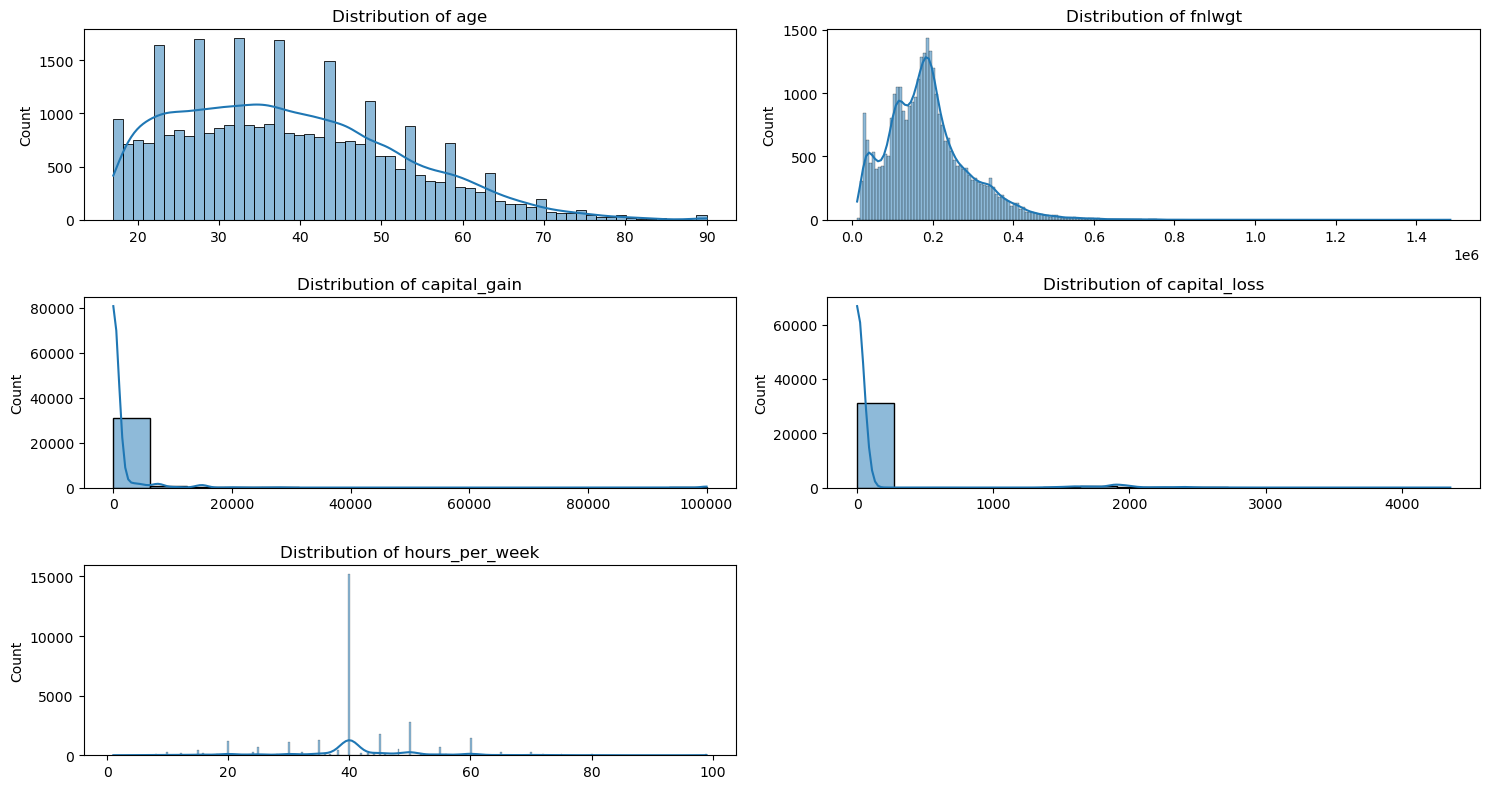

In [262]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 8))  # Adjust the number of rows and columns as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column with missing values
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel("")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Show the plot
plt.tight_layout()
plt.show()

**Final Scaling Strategy:**

**Min-Max Scaling:**

- fnlwgt
- capital_gain
- capital_loss

**Standard Scaling:**

- age
- hours_per_week

**Next Steps:**

We can now apply these transformations and scaling techniques to prepare the data for model training. This approach should help in normalizing the data, thereby improving the model's performance. 

### Applying scaling techniques to numerical features:

**1. Standard Scaling**

*Standard Scaling (or Z-score normalization) transforms the data so that it has a mean of 0 and a standard deviation of 1. This technique is useful when the features in the dataset have different units or different means and variances. Standard Scaling is particularly beneficial when the data is normally distributed.*

**2. Min-Max Scaling**

*Min-Max Scaling transforms the features to a fixed range, typically between 0 and 1. This is useful when you want to preserve the relationships between the values (e.g., when working with neural networks) or when the data has a non-normal distribution.*

### Before moving to the scaling we how to preserve the original dataset for future use

In [263]:
# Copying the dataset 
df_copy = df.copy()

#### Feature Scaling using Standard Scaler and min-max scaling

In [264]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Selecting the columns for each scaling method
standard_scaler_cols = ['age', 'hours_per_week']
min_max_scaler_cols = ['fnlwgt', 'capital_gain', 'capital_loss']

# Initialize the scalers
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

# Apply Standard Scaling
df[standard_scaler_cols] = standard_scaler.fit_transform(df[standard_scaler_cols])

# Apply Min-Max Scaling
df[min_max_scaler_cols] = min_max_scaler.fit_transform(df[min_max_scaler_cols])

# Display the first few rows of the transformed data
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.030671,State-gov,0.044302,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,-0.035429,United-States,<=50K
1,0.837109,Self-emp-not-inc,0.048238,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,-2.222153,United-States,<=50K
2,-0.042642,Private,0.138113,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,-0.035429,United-States,<=50K
3,1.057047,Private,0.151068,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,-0.035429,United-States,<=50K
4,-0.775768,Private,0.221488,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,-0.035429,Cuba,<=50K


**When to Use Each Technique**

**Standard Scaling:** Ideal for algorithms that assume normally distributed data (e.g., linear regression, logistic regression) or when the model's performance is sensitive to the magnitude of the data.

**Min-Max Scaling:** Preferred when the data needs to be scaled to a specific range (e.g., 0 to 1) for algorithms like neural networks, where the feature range can significantly affect the model's convergence.

*By applying these scaling techniques, we'll ensure that the numerical features in our dataset are on comparable scales, which can lead to better model performance and faster convergence during training.*

## **2. Encoding Techniques:**

### Identifying Categorical Variables:

In [265]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Separate columns based on the number of unique categories
one_hot_cols = [col for col in categorical_cols if df[col].nunique() < 5]
label_encode_cols = [col for col in categorical_cols if df[col].nunique() >= 5] +['education_num']

print("One-Hot Encoding Columns:", one_hot_cols)
print("Label Encoding Columns:", label_encode_cols)

One-Hot Encoding Columns: ['sex', 'income']
Label Encoding Columns: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'native_country', 'education_num']


### Apply One-Hot Encoding

One-Hot Encoding will be applied to categorical variables with less than 5 categories.

In [266]:
# Initialize the OneHotEncoder

from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)

# Apply One-Hot Encoding to the selected columns
df_one_hot_encoded = pd.DataFrame(one_hot_encoder.fit_transform(df[one_hot_cols]), 
                                  columns=one_hot_encoder.get_feature_names_out(one_hot_cols))

# Drop the original columns and concatenate the one-hot encoded columns
df = df.drop(one_hot_cols, axis=1)
df = pd.concat([df, df_one_hot_encoded], axis=1)

df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K
0,0.030671,State-gov,0.044302,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0.02174,0.0,-0.035429,United-States,1.0,0.0
1,0.837109,Self-emp-not-inc,0.048238,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0.00000,0.0,-2.222153,United-States,1.0,0.0
2,-0.042642,Private,0.138113,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0.00000,0.0,-0.035429,United-States,1.0,0.0
3,1.057047,Private,0.151068,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0.00000,0.0,-0.035429,United-States,1.0,0.0
4,-0.775768,Private,0.221488,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0.00000,0.0,-0.035429,Cuba,0.0,0.0


**Notations after One-hot Encoding:-**

For 'sex' Column:
- sex_Male = 0 means  (Sex is Female)
- sex_Male = 1 means (Sex is Male)

For 'income' Column:
- income_>50K = 0 means  (Income <= 50K)
- income_>50K = 1 means (Income > 50K)

### Apply Label Encoding:

Label Encoding will be applied to categorical variables with more than 5 categories.

In [267]:
# Initialize the LabelEncoder

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to the selected columns
for col in label_encode_cols:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K
0,0.030671,7,0.044302,9,12,4,1,1,4,0.02174,0.0,-0.035429,39,1.0,0.0
1,0.837109,6,0.048238,9,12,2,4,0,4,0.00000,0.0,-2.222153,39,1.0,0.0
2,-0.042642,4,0.138113,11,8,0,6,1,4,0.00000,0.0,-0.035429,39,1.0,0.0
3,1.057047,4,0.151068,1,6,2,6,0,2,0.00000,0.0,-0.035429,39,1.0,0.0
4,-0.775768,4,0.221488,9,12,2,10,5,2,0.00000,0.0,-0.035429,5,0.0,0.0


#### **Pros and Cons of One-Hot Encoding and Label Encoding:**

#### **One-Hot Encoding:**

**Pros:**
- **No Ordinality Assumption:** One-Hot Encoding does not assume any order in the categorical features, making it suitable for nominal data (where the categories do not have a meaningful order).
- **Model Compatibility:** Many machine learning algorithms (like linear models, logistic regression, etc.) work better with One-Hot Encoded data as it prevents the model from assuming a natural ordering between categories.
- **Interpretability:** It is easier to interpret the model output when using One-Hot Encoding because each category is represented by a separate column.

**Cons:**
- **High Dimensionality:** For features with many unique categories, One-Hot Encoding can lead to a large number of columns, which can increase the dimensionality of the dataset and lead to the "curse of dimensionality."
- **Memory Usage:** The increase in dimensionality can also result in higher memory usage and longer training times for the model.

#### **Label Encoding:**

**Pros:**
- **Simplicity:** Label Encoding is straightforward and converts categories into integers, which can be more efficient in terms of memory and computation.
- **Efficiency:** It is computationally more efficient than One-Hot Encoding, especially when there are many categories.

**Cons:**
- **Ordinality Assumption:** Label Encoding introduces an ordinality assumption, meaning that the model might incorrectly assume that some categories are more significant than others (e.g., `category 3` is greater than `category 2`).
- **Potential Bias:** In cases where there is no natural order in the categories, Label Encoding can bias the model into thinking one category is greater or less than another, which may lead to suboptimal performance.

### **Conclusion:**

- **When to Use One-Hot Encoding:** It's best used when the categorical feature does not have an intrinsic order, and the number of categories is relatively small.
- **When to Use Label Encoding:** Label Encoding is appropriate when the categorical feature has a meaningful order or when dealing with a large number of categories to avoid the high dimensionality of One-Hot Encoding.

By applying these techniques appropriately, we ensure that our machine learning model receives the categorical data in the most suitable format, potentially improving its performance and accuracy.

## **3. Feature Engineering:**

### Creating New Features:

#### 1. hours_per_week_binned:

**Rationale:** The hours_per_week feature represents the number of hours a person works per week. Instead of using it as a continuous variable, we can group it into bins such as part-time, full-time, and overtime. This categorization could help the model understand the impact of work hours on income, especially when income thresholds like $50K/year are considered.

In [268]:
# Binning the hours_per_week into categories
bins = [0, 20, 40, 60, 100]
labels = ['part-time', 'full-time', 'overtime', 'extreme']
df_copy['hours_per_week_binned'] = pd.cut(df_copy['hours_per_week'], bins=bins, labels=labels)

#### 2. age_bucket:

**Rationale:** Age could have a non-linear relationship with income, where different age groups might have different income levels. For instance, younger individuals may earn less due to lack of experience, while those in their prime working years might earn more. Creating age buckets could help the model capture this non-linear relationship more effectively.


In [269]:
# Creating age buckets
age_bins = [0, 25, 45, 65, 90]
age_labels = ['young', 'middle-aged', 'senior', 'retired']
df_copy['age_bucket'] = pd.cut(df_copy['age'], bins=age_bins, labels=age_labels)

### Encode the New Categorical Features

Now that you have created the new features, you need to encode them similarly to how the original categorical features were encoded.

One-Hot Encoding hours_per_week_binned and age_bucket (Categorical Features):

In [270]:
# Apply One-Hot Encoding to the new categorical features
df_copy = pd.get_dummies(df_copy, columns=['hours_per_week_binned', 'age_bucket'])

# Convert only the boolean columns to integers (1 and 0)
boolean_columns = df_copy.select_dtypes(include='bool').columns
df_copy[boolean_columns] = df_copy[boolean_columns].astype(int)

### Applying Transformation on Skewed Feature:

#### identifying the Skewed Feature:

capital_gain is typically highly skewed because most people don't have significant capital gains, but a few have very high values. This feature is a good candidate for a log transformation to reduce skewness.

#### Applying Log Transformation:

**Rationale:** Log transformation helps in normalizing the distribution of the data, making it easier for the model to learn from the feature. By applying log transformation, large values are compressed, and the overall distribution becomes more Gaussian, which can improve model performance.

In [271]:
# Log transformation for capital-gain
df['capital_gain'] = np.log(df['capital_gain'] + 1)

In [247]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K
0,0.030671,7,0.044302,9,12,4,1,1,4,0.021507,0.0,-0.035429,39,1.0,0.0
1,0.837109,6,0.048238,9,12,2,4,0,4,0.000000,0.0,-2.222153,39,1.0,0.0
2,-0.042642,4,0.138113,11,8,0,6,1,4,0.000000,0.0,-0.035429,39,1.0,0.0
3,1.057047,4,0.151068,1,6,2,6,0,2,0.000000,0.0,-0.035429,39,1.0,0.0
4,-0.775768,4,0.221488,9,12,2,10,5,2,0.000000,0.0,-0.035429,5,0.0,0.0


## **4. Feature Selection and Outlier Handling**

### Using the Isolation Forest Algorithm to Identify and Remove Outliers:

The Isolation Forest algorithm is an effective method for outlier detection. It works by isolating observations in a dataset, with outliers being isolated faster than regular data points.

In [272]:
from sklearn.ensemble import IsolationForest

# Initialize the Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Fit the model and predict outliers (1 = inlier, -1 = outlier)
df['outlier'] = iso_forest.fit_predict(df)

In [273]:
# Count the total number of outliers
total_outliers = df[df['outlier'] == -1].shape[0]

print(f"Total number of outliers: {total_outliers}")

Total number of outliers: 1628


In [274]:
# Filter out the outliers
df_clean = df[df['outlier'] == 1].drop(columns=['outlier'])

# Cleaned Dataset
df_clean

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K
0,0.030671,7,0.044302,9,12,4,1,1,4,0.021507,0.0,-0.035429,39,1.0,0.0
1,0.837109,6,0.048238,9,12,2,4,0,4,0.000000,0.0,-2.222153,39,1.0,0.0
2,-0.042642,4,0.138113,11,8,0,6,1,4,0.000000,0.0,-0.035429,39,1.0,0.0
3,1.057047,4,0.151068,1,6,2,6,0,2,0.000000,0.0,-0.035429,39,1.0,0.0
4,-0.775768,4,0.221488,9,12,2,10,5,2,0.000000,0.0,-0.035429,5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-1.215643,4,0.202298,15,9,4,11,1,4,0.000000,0.0,-0.035429,39,1.0,0.0
32556,-0.849080,4,0.166404,7,11,2,13,5,4,0.000000,0.0,-0.197409,39,0.0,0.0
32557,0.103983,4,0.096500,11,8,2,7,0,4,0.000000,0.0,-0.035429,39,1.0,1.0
32558,1.423610,4,0.094827,11,8,6,1,4,4,0.000000,0.0,-0.035429,39,0.0,0.0


#### **Discussion on Outliers and Model Performance:**

Outliers are extreme values that deviate significantly from the majority of the data. They can negatively impact model performance in several ways:

- **Impact on Model Accuracy:** Outliers can skew the model’s understanding of the data, leading to less accurate predictions. For example, in regression models, outliers can disproportionately influence the slope of the regression line.
  
- **Loss Function Sensitivity:** Many machine learning models optimize a loss function during training. Outliers can lead to higher error terms, causing the model to prioritize these anomalies over the general trend in the data.
  
- **Overfitting:** If a model tries to accommodate outliers, it may become overly complex, capturing noise instead of the underlying pattern, leading to overfitting.

By removing outliers using the Isolation Forest, we help the model focus on the majority of the data, leading to better generalization and more robust performance.

### Applying the Predictive Power Score (PPS) to Find Relationships Between Features:

The Predictive Power Score (PPS) is an advanced alternative to traditional correlation metrics. It measures the predictive power of one feature to predict another, making it more versatile for different types of relationships (linear and non-linear).

In [275]:
import ppscore as pps

# Compute the PPS matrix for the DataFrame
pps_matrix = pps.matrix(df)

# Filter the matrix to show only meaningful results
pps_matrix_filtered = pps_matrix[(pps_matrix['ppscore'] > 0.1) & (pps_matrix['ppscore'] < 1)]

# Display the PPS matrix
print(pps_matrix_filtered[['x', 'y', 'ppscore']])

                  x               y   ppscore
5               age  marital_status  0.169528
22        workclass      occupation  0.106895
80   marital_status             age  0.201582
87   marital_status    relationship  0.132852
97       occupation       workclass  0.208607
100      occupation   education_num  0.155121
112    relationship             age  0.137371
117    relationship  marital_status  0.295032
125    relationship       sex_ Male  0.225569
215       sex_ Male    relationship  0.135915


#### **Discussion and Comparison with Correlation Matrix:**

- **PPS vs. Correlation Matrix:**
  - **Correlation Matrix:** Measures the linear relationship between features, with values ranging from -1 to 1. It is limited to linear dependencies and can miss non-linear relationships.
  - **PPS:** Can detect non-linear relationships and gives a score between 0 (no predictive power) and 1 (perfect predictive power). PPS is asymmetric, meaning `PPS(x, y)` is not necessarily equal to `PPS(y, x)`, which is helpful for understanding directional relationships.

- **Findings:**
  - The PPS might reveal important predictive relationships between features that the correlation matrix might miss. For example, if a feature has a non-linear impact on another, PPS will capture this, while the correlation might show a weak or no relationship.
  - PPS can also highlight feature interactions that are more complex, guiding more effective feature selection and engineering.

**Conclusion:**
Using Isolation Forest for outlier removal enhances model robustness by eliminating the distorting effect of extreme values. PPS offers a more nuanced understanding of feature relationships, particularly for complex or non-linear dependencies, complementing the traditional correlation matrix. Together, these techniques can significantly improve the feature selection process and ultimately lead to better model performance.

####  **Author Information:**
- **Author:-**  Er.Pradeep Kumar
- **LinkedIn:-**  [https://www.linkedin.com/in/pradeep-kumar-1722b6123/](https://www.linkedin.com/in/pradeep-kumar-1722b6123/)

#### **Disclaimer:**
This Jupyter Notebook and its contents are shared for educational purposes. The author, Pradeep Kumar, retains ownership and rights to the original content. Any modifications or adaptations should be made with proper attribution and permission from the author.